# Exemple de codage de l'algorithme des KNN

### Génération de points

In [138]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(50)
num_points = 200
import math

# Générer des points pour la classe 0
mean_class_0 = [2, 3]
std_dev_class_0 = [1.5, 1.5]
class_0_points = np.column_stack([
    np.random.normal(mean_class_0[0], std_dev_class_0[0], int(num_points/2)),
    np.random.normal(mean_class_0[1], std_dev_class_0[1], int(num_points/2))
])

# Générer des points pour la classe 1
mean_class_1 = [4, 5]
std_dev_class_1 = [1.5, 1.5]
class_1_points = np.column_stack([
    np.random.normal(mean_class_1[0], std_dev_class_1[0], int(num_points/2)),
    np.random.normal(mean_class_1[1], std_dev_class_1[1], int(num_points/2))
])

# Fusionner les points des deux classes
all_points = np.vstack([class_0_points, class_1_points])

# Créer les étiquettes de classe correspondantes
labels = np.hstack([np.zeros(int(num_points/2)), np.ones(int(num_points/2))])

# Mélanger les données et les étiquettes de manière aléatoire
indices = np.random.permutation(num_points)
all_points = all_points[indices]
labels = labels[indices]

# Définir la proportion d'entraînement
train_ratio = 0.8

# Diviser les données en ensembles d'entraînement et de test
train_size = int(train_ratio * num_points)
train_data, test_data = all_points[:train_size], all_points[train_size:]
train_labels, test_labels = labels[:train_size], labels[train_size:]

### Affichage des données d'entraînement

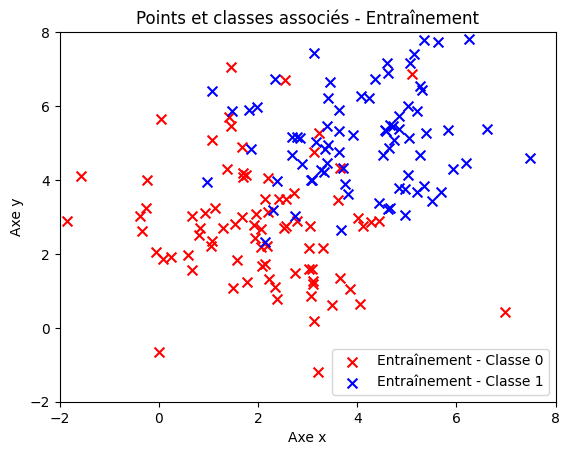

In [139]:
# Affichons les points d'entraînement sous forme de carrés
plt.scatter(train_data[train_labels == 0][:, 0], train_data[train_labels == 0][:, 1], marker='x', color='red', label='Entraînement - Classe 0', s=50)
plt.scatter(train_data[train_labels == 1][:, 0], train_data[train_labels == 1][:, 1], marker='x', color='blue', label='Entraînement - Classe 1', s=50)

# Ajoutons des labels et une légende
plt.title('Points et classes associés - Entraînement')
plt.xlabel('Axe x')
plt.ylabel('Axe y')
plt.xlim(-2,8)
plt.ylim(-2,8)
plt.legend()

# Affichons le graphique
plt.show()

### Affichage des nouvelles données à classifier

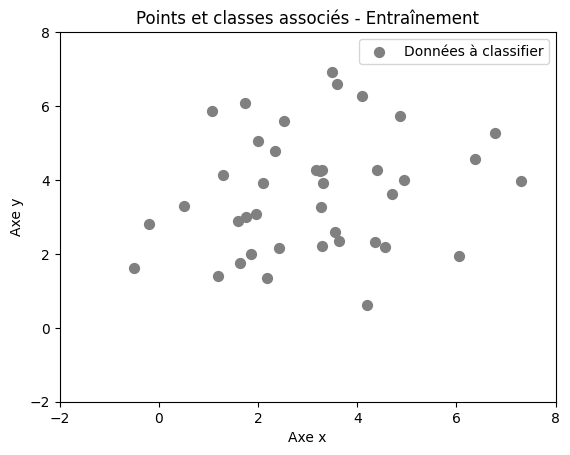

In [140]:
# Affichons les points de test sous forme de cercles (grisés)
plt.scatter(test_data[:, 0], test_data[:, 1], marker='o', color='gray', label='Données à classifier', s=50)

# Ajoutons des labels et une légende
plt.title('Points et classes associés - Entraînement')
plt.xlabel('Axe x')
plt.ylabel('Axe y')
plt.xlim(-2,8)
plt.ylim(-2,8)
plt.legend()

# Affichons le graphique
plt.show()

In [141]:
def calculer_dist_euclidienne(point_test, liste_entrainement) :
    liste_distance = []
    for i in range(len(liste_entrainement)) :
        distance_x = (point_test[0] - liste_entrainement[i][0])**2 #(X_2-X_1)^2
        distance_y = (point_test[1] - liste_entrainement[i][1])**2 #(Y_2-Y_1)^2
        liste_distance.append(math.sqrt(distance_x + distance_y))
    return liste_distance

def trouver_k_plus_proche_voisin(liste_distance, k) :
    indices_kppv = []
    for i in range(k) : #On cherche le 1er plus proche voisin, puis le second, puis le troisième....
        mininum = min(liste_distance) #On trouve le minimum
        index_minimum = liste_distance.index(mininum) #Puis l'index associé au minimum
        liste_distance[index_minimum] = math.inf #Enfin, on remplace cette valeur par l'infini pour ne pas retomber dessus ensuite
        indices_kppv.append(index_minimum)
    return indices_kppv

def classer_point(point_test, liste_entrainement, labels_entrainement, k) :
    liste_distance = calculer_dist_euclidienne(point_test, liste_entrainement)
    indices_kppv = trouver_k_plus_proche_voisin(liste_distance, k)
    
    classes_entrainement = []
    for i in indices_kppv :
        classes_entrainement.append(labels_entrainement[i])
    if sum(classes_entrainement) > k/2 :
        classe_majoritaire = 1
    else :
        classe_majoritaire = 0

    return classe_majoritaire

In [144]:
prediction_classe_test = []
for i in range(len(test_data)) :
    prediction_classe_test.append(classer_point(test_data[i], train_data, train_labels, 3))

print(prediction_classe_test)
prediction_classe_test = np.array(prediction_classe_test)

[0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0]


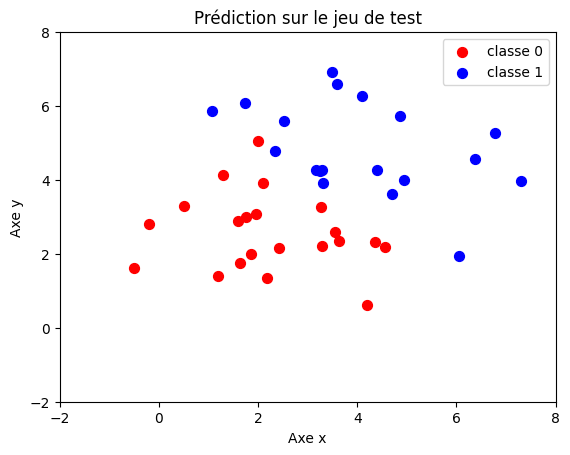

In [145]:
# Affichons les points de test sous forme de cercles (grisés)
plt.scatter(test_data[prediction_classe_test == 0][:, 0], test_data[prediction_classe_test == 0][:, 1], marker='o', color='red', label='classe 0', s=50)
plt.scatter(test_data[prediction_classe_test == 1][:, 0], test_data[prediction_classe_test == 1][:, 1], marker='o', color='blue', label='classe 1', s=50)

# Ajoutons des labels et une légende
plt.title('Prédiction sur le jeu de test')
plt.xlabel('Axe x')
plt.ylabel('Axe y')
plt.xlim(-2,8)
plt.ylim(-2,8)
plt.legend()

# Affichons le graphique
plt.show()

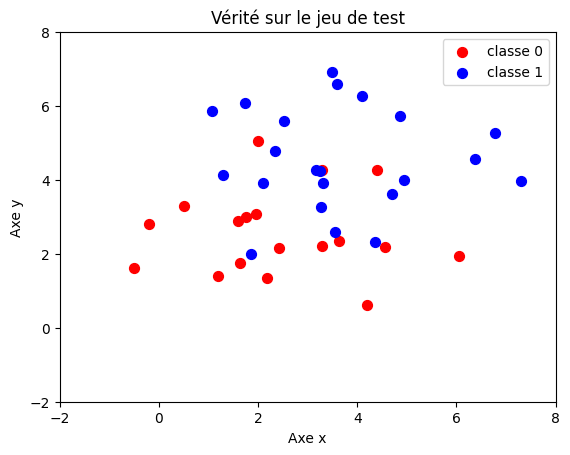

In [146]:
# Affichons les points de test sous forme de cercles (grisés)
plt.scatter(test_data[test_labels == 0][:, 0], test_data[test_labels == 0][:, 1], marker='o', color='red', label='classe 0', s=50)
plt.scatter(test_data[test_labels == 1][:, 0], test_data[test_labels == 1][:, 1], marker='o', color='blue', label='classe 1', s=50)

# Ajoutons des labels et une légende
plt.title('Vérité sur le jeu de test')
plt.xlabel('Axe x')
plt.ylabel('Axe y')
plt.xlim(-2,8)
plt.ylim(-2,8)
plt.legend()

# Affichons le graphique
plt.show()

### Calcul de la précision de notre modèle 

In [147]:
def compute_accuracy(predictions, ground_truth):
    if len(predictions) != len(ground_truth):
        raise ValueError("Length of predictions and ground_truth should be the same.")

    correct_predictions = sum(p == gt for p, gt in zip(predictions, ground_truth))
    total_samples = len(predictions)

    accuracy = correct_predictions / total_samples

    return accuracy

In [148]:
accuracy = compute_accuracy(prediction_classe_test, test_labels)
print(f"Précision: {accuracy * 100:.2f}%")

Précision: 77.50%


In [149]:
accuracies = []
for k in range(10) :
    prediction_classe_test = []
    for i in range(len(test_data)) :
        prediction_classe_test.append(classer_point(test_data[i], train_data, train_labels, k))
    accuracy = compute_accuracy(prediction_classe_test, test_labels)
    accuracies.append(accuracy)
    print(f"Pour k={k}, Précision: {accuracy * 100:.2f}%")

Pour k=0, Précision: 45.00%
Pour k=1, Précision: 72.50%
Pour k=2, Précision: 75.00%
Pour k=3, Précision: 77.50%
Pour k=4, Précision: 75.00%
Pour k=5, Précision: 75.00%
Pour k=6, Précision: 72.50%
Pour k=7, Précision: 75.00%
Pour k=8, Précision: 72.50%
Pour k=9, Précision: 72.50%


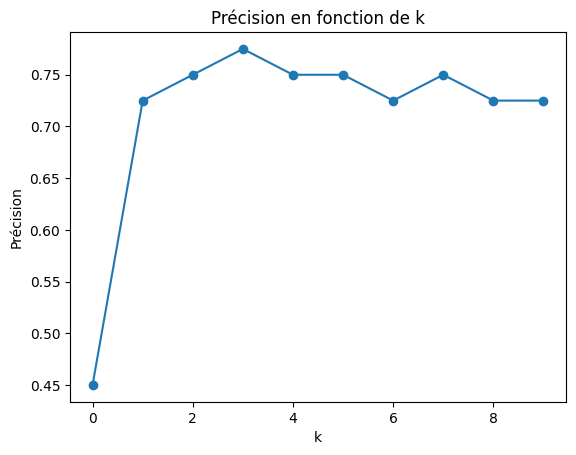

In [150]:
k_values = range(10)
plt.plot(k_values, accuracies, marker='o')
plt.title('Précision en fonction de k')
plt.xlabel('k')
plt.ylabel('Précision')
plt.show()